**TITLE OF PROJECT**-TITANIC SURVIVAL PREDICTION

**OBJECTIVE**-THE DATASET CONTAINS THE DETAILS OF PASSENGERS WHO BOARDED THE TITANIC SHIP AND PREDICTS ABOUT THEIR SURVIVAL USING FEATURES SUCH AS AGE, GENDER AND PASSENGER CLASS.

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#IMPORT DATASET
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv')

In [4]:
#DESCRIBING DATASET
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

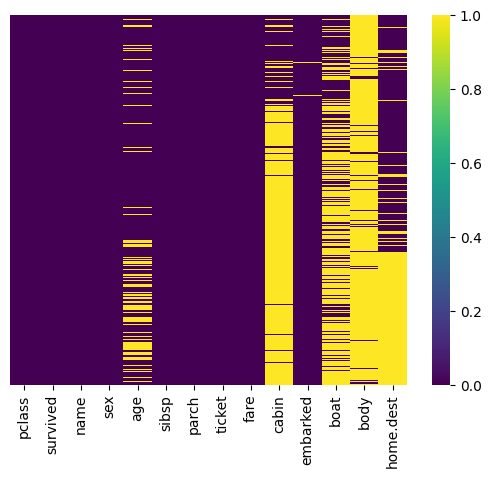

In [9]:
#REPRESENTATION OF NULL VALUES
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [10]:
#REMOVING THE NULL VALUES
df['age']=df['age'].fillna(df['age'].mean())

In [11]:
df['fare']=df['fare'].fillna(df['fare'].mean())

In [12]:
df.drop(['cabin','boat','body'],axis=1,inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

<Axes: >

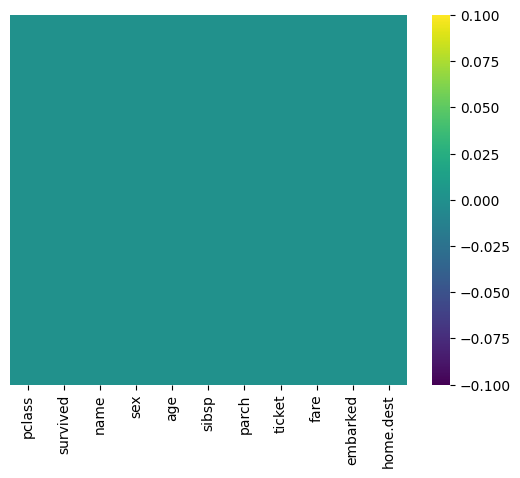

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<ipython-input-16-b21169accbe7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


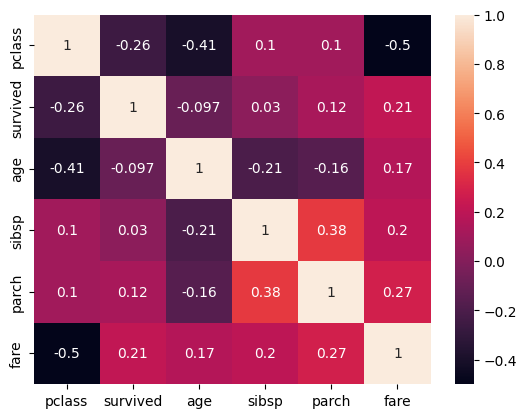

In [16]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Axes: xlabel='survived', ylabel='count'>

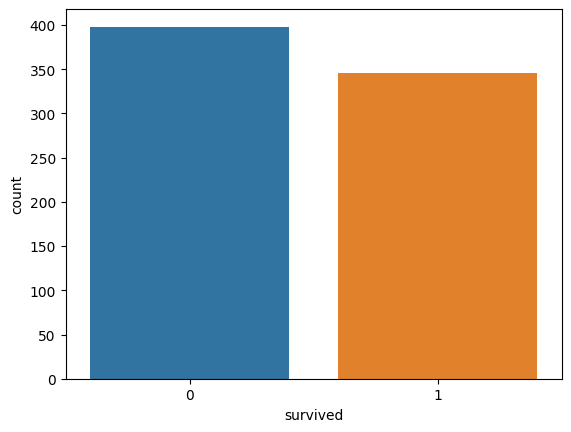

In [17]:
#DATA VISUALIZATION
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

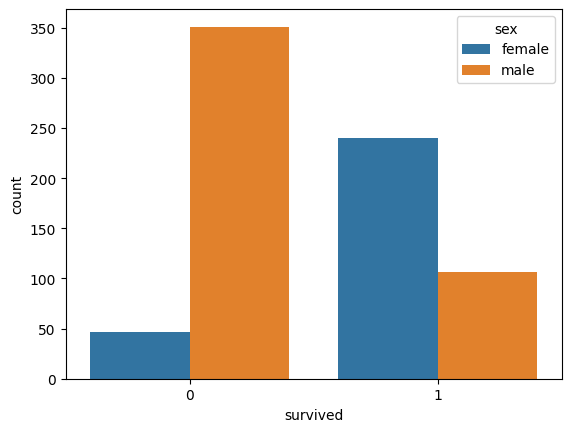

In [18]:
sns.countplot(x='survived',hue='sex',data=df)

<Axes: xlabel='survived', ylabel='count'>

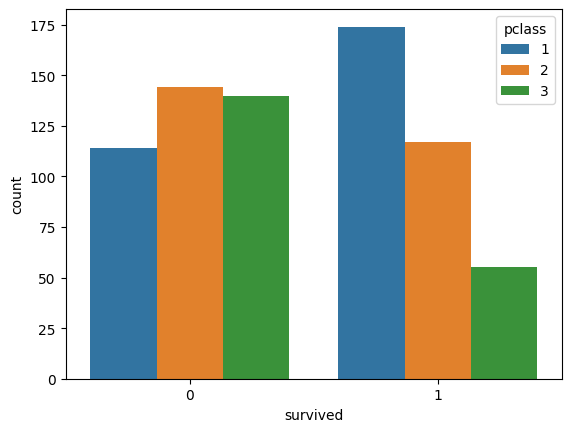

In [19]:
sns.countplot(x='survived',hue='pclass',data=df)

<Axes: xlabel='survived', ylabel='count'>

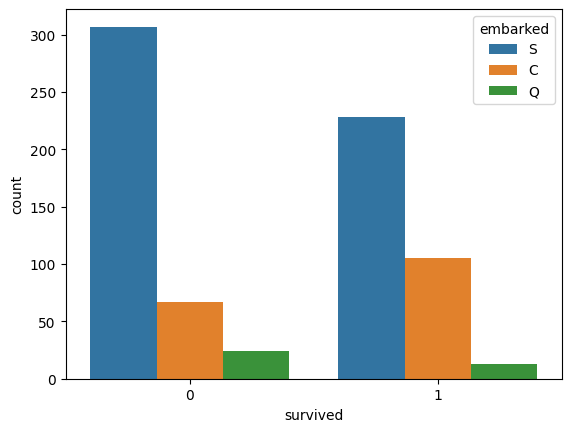

In [20]:
sns.countplot(x='survived',hue='embarked',data=df)

<Axes: ylabel='Frequency'>

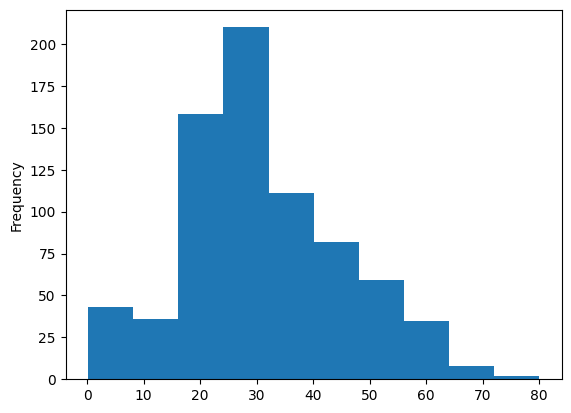

In [21]:
df['age'].plot.hist()

<Axes: xlabel='pclass', ylabel='age'>

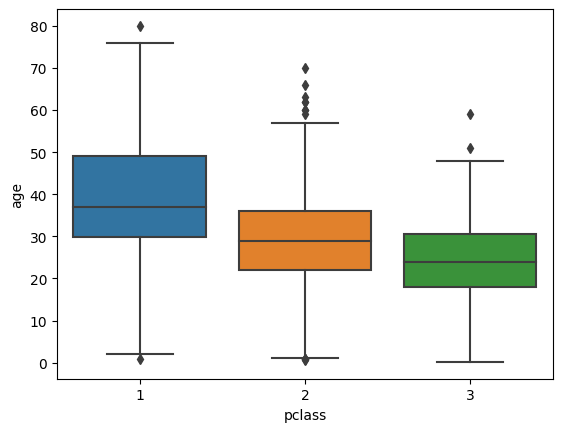

In [22]:
sns.boxplot(x='pclass',y='age',data=df)

In [23]:
# CONVERTING NUMERICAL VALUES TO CATEGORICAL VALUES
Sex=pd.get_dummies(df['sex'])
Embarked=pd.get_dummies(df['embarked'])

In [24]:
Sex

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
838,0,1
839,0,1
1063,0,1
1089,0,1


In [25]:
Embarked

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
838,0,0,1
839,0,0,1
1063,0,0,1
1089,0,0,1


In [26]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [27]:
df.drop(['sex','embarked'],axis=1,inplace=True)

In [28]:
#DEFINE TARGET VARIABLE Y AND FEATURE X
df.columns

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'home.dest', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [29]:
y=df['survived']
y.shape

(744,)

In [30]:
X=df[['pclass','age','female','male','C','Q','S']]
X.shape

(744, 7)

In [31]:
X

,pclass,age,female,male,C,Q,S
0,1,29.00,1,0,0,0,1
1,1,0.92,0,1,0,0,1
2,1,2.00,1,0,0,0,1
3,1,30.00,0,1,0,0,1
4,1,25.00,1,0,0,0,1
...,...,...,...,...,...,...,...
838,3,28.00,0,1,0,0,1
839,3,19.00,0,1,0,0,1
1063,3,41.00,0,1,0,0,1
1089,3,20.00,0,1,0,0,1


In [32]:
#TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((520, 7), (224, 7), (520,), (224,))

In [33]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [34]:
lr.intercept_

array([3.57617534])

In [35]:
lr.coef_

array([[-1.17269436, -0.03696438,  1.41785083, -1.41782985, -0.00244901,
         0.11458866, -0.11211866]])

In [36]:
#Predict test data
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0])

In [37]:
#Model Accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.87      0.82       111\n           1       0.86      0.75      0.80       113\n\n    accuracy                           0.81       224\n   macro avg       0.82      0.81      0.81       224\nweighted avg       0.82      0.81      0.81       224\n'

In [38]:
confusion_matrix(y_test,y_pred)

array([[97, 14],
       [28, 85]])

In [39]:
accuracy_score(y_test,y_pred)*100

81.25

In [40]:
#TAKING INPUT FROM USER FOR PREDICTING ABOUT NEW PASSENGER
class_inp=int(input("Enter the Class of the Passenger:"))
age_inp=int(input("Enter the age of the Passenger:"))
mal_inp=int(input("Press 1 if the Passenger is male else Press 0:"))
if(mal_inp==1):
  fem_inp=0
else:
  fem_inp=1
C_inp=int(input("Press 1 if the Passenger is from Cherbourg else Press 0:"))
if(C_inp==1):
  S_inp=0
  Q_inp=0
if(C_inp==0):
  Q_inp=int(input("Press 1 if the Passenger is from Queensville else Press 0:"))
if(C_inp==0 and Q_inp==0):
  S_inp=1
else:
  S_inp=0
user_inp={'pclass':class_inp,'age':age_inp,'female':fem_inp,'male':mal_inp,'C':C_inp,'Q':Q_inp,'S':S_inp}
user=pd.DataFrame(user_inp,index=[1])
print("The details you entered are:\n",user)
ypred2=lr.predict(user)
if(ypred2==0):
  print("The Passenger did not Survive.")
else:
  print("The Passenger did Survive.")

Enter the Class of the Passenger:1
Enter the age of the Passenger:74
Press 1 if the Passenger is male else Press 0:0
Press 1 if the Passenger is from Cherbourg else Press 0:1
The details you entered are:
    pclass  age  female  male  C  Q  S
1       1   74       1     0  1  0  0
The Passenger did Survive.
